In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [4]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

-35.80361588131185 -83.7436627326256
-43.369528572473975 -102.48261002159552
62.01924845770634 149.94165553615363
83.4332080766278 57.32099227503301
27.942040944646152 54.62228560104279
-23.574446842492236 -176.77397861998992
-48.02262540824421 -83.87233678686762
47.51760162466945 -115.67286399460666
-47.48957201607121 -41.30879372216228
80.80068401467963 -156.99737575611238
43.95683465549587 -69.43191095945481
-65.63088402151084 147.67455512614623
-59.936099375754694 -150.21920347731987
8.546900764562835 -125.51814765541972
35.01332533783939 -53.94150388849623
-66.49645002992598 139.0120811271252
73.64227020075208 42.164566507364555
23.105073340568183 -58.51667873144159
8.791337485524338 -136.40288040714626
-76.30586034296735 -89.0488937903226
12.310307841489376 -158.0085311615058
4.1259735199491985 -118.34855871311112
-63.67213126578385 95.27719578649027
56.591931663510195 -84.77439925210308
-5.610466461569487 109.87840573028541
78.51236875746406 29.71840952804891
-74.48324822292213 

In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

In [9]:
import requests

In [10]:
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [12]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | yagodnoye
Processing Record 4 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 1 | lar
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | hayden
Processing Record 8 of Set 1 | chuy
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | waldoboro
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | cabo san lucas
Processing Record 14 of Set 1 | saint george
Processing Record 15 of Set 1 | ostrovnoy
Processing Record 16 of Set 1 | codrington
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | san patricio
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | attawapiskat
City not found. S

In [14]:
len(city_data)

541

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.6167,-73.6500,48.15,84,35,10.65,CL,2022-07-10 02:52:56
1,Castro,-24.7911,-50.0119,53.83,84,67,3.74,BR,2022-07-10 02:52:57
2,Yagodnoye,62.5500,149.6667,71.44,49,45,6.13,RU,2022-07-10 02:52:57
3,Lar,26.2039,83.9717,93.24,49,3,11.83,IN,2022-07-10 02:52:58
4,Vaini,-21.2000,-175.2000,77.16,73,20,12.66,TO,2022-07-10 02:52:58
5,Hayden,47.7660,-116.7866,77.04,36,0,10.36,US,2022-07-10 02:52:58
6,Chuy,-33.6971,-53.4616,61.86,91,92,13.15,UY,2022-07-10 02:52:59
7,Barrow,71.2906,-156.7887,55.42,71,0,11.50,US,2022-07-10 02:48:02
8,Waldoboro,44.0954,-69.3756,60.53,69,3,4.70,US,2022-07-10 02:52:59
9,Hobart,-42.8794,147.3294,54.23,68,75,11.50,AU,2022-07-10 02:53:00


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lebu,CL,2022-07-10 02:52:56,-37.6167,-73.6500,48.15,84,35,10.65
1,Castro,BR,2022-07-10 02:52:57,-24.7911,-50.0119,53.83,84,67,3.74
2,Yagodnoye,RU,2022-07-10 02:52:57,62.5500,149.6667,71.44,49,45,6.13
3,Lar,IN,2022-07-10 02:52:58,26.2039,83.9717,93.24,49,3,11.83
4,Vaini,TO,2022-07-10 02:52:58,-21.2000,-175.2000,77.16,73,20,12.66
5,Hayden,US,2022-07-10 02:52:58,47.7660,-116.7866,77.04,36,0,10.36
6,Chuy,UY,2022-07-10 02:52:59,-33.6971,-53.4616,61.86,91,92,13.15
7,Barrow,US,2022-07-10 02:48:02,71.2906,-156.7887,55.42,71,0,11.50
8,Waldoboro,US,2022-07-10 02:52:59,44.0954,-69.3756,60.53,69,3,4.70
9,Hobart,AU,2022-07-10 02:53:00,-42.8794,147.3294,54.23,68,75,11.50


In [17]:
# Create the output file (CSV) 
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting 
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

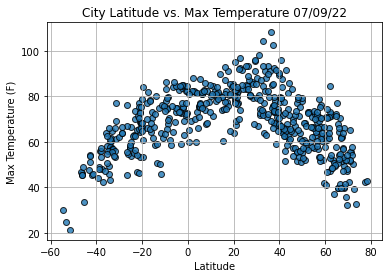

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

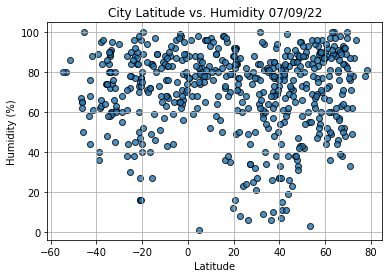

In [21]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

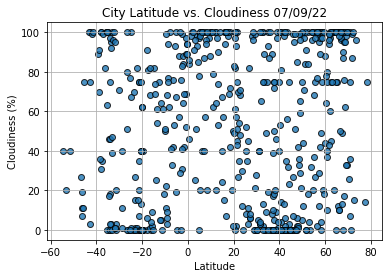

In [22]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

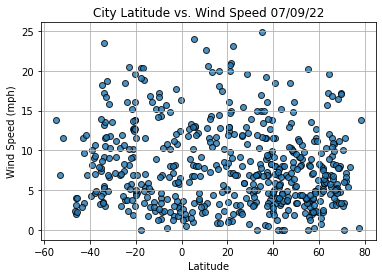

In [23]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()